In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib notebook

import os
import numpy as np
import scipy.signal
import pyabf

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import ipywidgets as widgets
import IPython.display

import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

from colinAnalysis import colinAnalysis

ImportError: No module named pyabf

In [ ]:
# load and analyze
path = '/media/cudmore/data/colin'
path = '/Users/cudmore/data/colin'
ca = colinAnalysis(path)
ca._analysisIdx = 1
ca.detect()

In [ ]:
ca.myShow()

In [ ]:
# plot spike clips
#ca = colinAnalysis(path)
ca.plotClips()

<IPython.core.display.Javascript object>


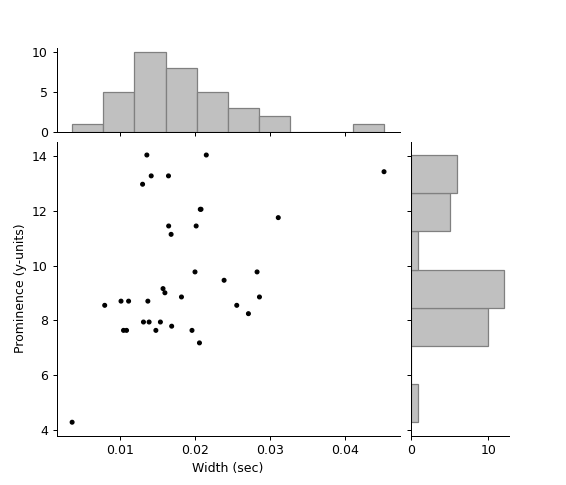

Output()

In [40]:
ca.scatterWidget()
ca.replotScatter()

In [41]:
dfAgg = ca.getStats()
print(dfAgg)

             ipi_ms  instFreq_hz     height  half_width_ms
count     34.000000    34.000000  35.000000      35.000000
min       29.300000     0.192571   3.417969       3.666667
max     5192.900000    34.129693  11.230469      45.125000
median   685.650000     1.458475   7.080078      16.500000
mean    1364.176471     3.714524   7.788086      18.163595


<IPython.core.display.Javascript object>


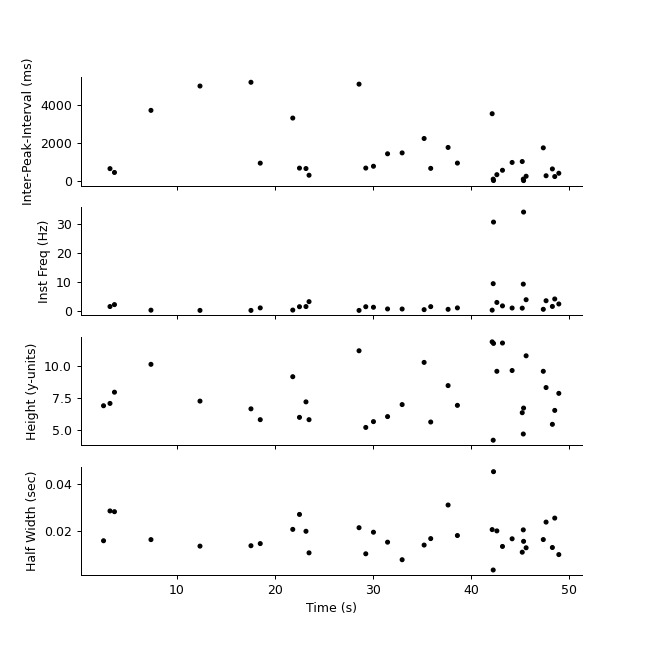

Text(0, 0.5, 'Half Width (sec)')

In [42]:
# plot (peak height, half width) as a function of time

analysis = ca.getAnalysis()
peaks = analysis['peaks']
halfWidth = analysis['halfWidth']
fullWidth = analysis['fullWidth']
acceptList = analysis['accept']

xPeakSec = ca._pnt2Sec(peaks)

numSubplot = 4
fig, axs = plt.subplots(numSubplot, 1, sharex=True, figsize=(8, 8))

myColors = ['k' if x else 'r' for x in acceptList]

showAll = True
if showAll:
    showMask = [True] * len(peaks)
else:
    showMask = acceptList
    
# strip based on showAll
xPeakSec = xPeakSec[showMask]
myColors = [myColors[idx] for idx,x in enumerate(showMask) if x]

# inter-peak-interval (sec)
peakDiffPnt = np.diff(peaks)
peakDiffMs = ca._pnt2Sec(peakDiffPnt) * 1000
myColorsFreq = myColors[1:]

axs[0].scatter(xPeakSec[1:], peakDiffMs, marker='.', c=myColorsFreq)
axs[0].set_ylabel('Inter-Peak-Interval (ms)')

# frequency
# inter-peak-interval (sec)
peakDiffPnt = np.diff(peaks)
peakFreq = 1 / ca._pnt2Sec(peakDiffPnt)
myColorsFreq = myColors[1:]

axs[1].scatter(xPeakSec[1:], peakFreq, marker='.', c=myColorsFreq)
axs[1].set_ylabel('Inst Freq (Hz)')

# height
yHeight = ca.sweepY[peaks] - fullWidth[1]
yHeight = yHeight[showMask]

axs[2].scatter(xPeakSec, yHeight, marker='.', c=myColors)
axs[2].set_ylabel('Height (y-units)')

#
halfWidth = halfWidth[0].copy()
halfWidth = halfWidth[showMask]

axs[3].scatter(xPeakSec, halfWidth, marker='.', c=myColors)
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Half Width (sec)')



In [180]:
# todo: package all results in Dataframe and generate stats (mean, sd, se, min, max, n)
